In [1]:
import pandas as pd
import requests
import re
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.formula.api as smf 

In [2]:
data_df = pd.read_csv('final_df_processed_2.csv')
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
0,5963,8323008024,167000,1946.0,91767,"629 WASHINGTON AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
1,5964,8318018031,263000,1964.0,91767,"1796 MARTELLO ST, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
2,5965,8366006010,176001,1952.0,91767,"2832 SUMNER AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
3,5966,8317037029,248000,1991.0,91767,"816 AMBER OAKS CIR, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
4,5967,8323011020,184001,1948.0,91767,"631 LORANNE AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0


In [3]:
len(data_df)

692035

In [4]:
len(data_df.loc[data_df["Year"] >= 2017])

249205

In [5]:
zip_df = data_df.loc[data_df['zip_code'] == 93535]
zip_df

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
4040,10410,3126007024,140000,2007.0,93535,"43442 5TH ST E, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4041,10411,3147014015,105001,1972.0,93535,"44633 BENALD ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4042,10412,3170063016,214002,2010.0,93535,"43048 DARBY ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4043,10413,3170063017,213502,2009.0,93535,"43042 DARBY ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4044,10414,3150065046,185001,2006.0,93535,"2835 E EMERALD LN, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,21860,3162010029,345003,1956.0,93535,"17110 E AVENUE K12, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0
15491,21861,3070006008,325003,1987.0,93535,"41028 168TH ST E, LAKE LOS ANGELES, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0
15492,21862,3176031036,566005,2019.0,93535,"1748 E HOLGUIN ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0
15493,21863,3170040083,435004,2004.0,93535,"1034 E AVENUE K11, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0


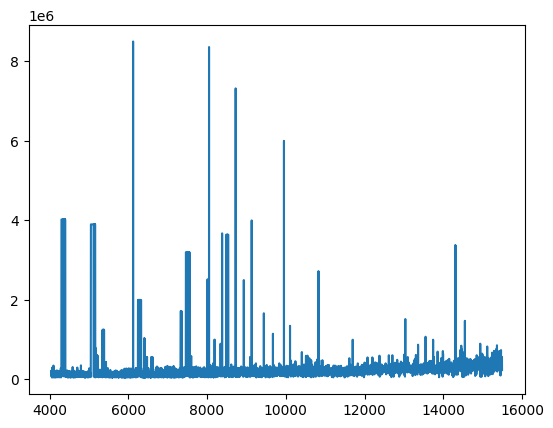

In [6]:
plt.plot(zip_df.index, zip_df['sale_price'])

In [7]:
zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


mod1 = smf.ols(f'change_sale_price ~ sale_price_Prev', data = zip_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_sale_price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     943.9
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          3.06e-199
Time:                        23:02:47   Log-Likelihood:            -1.6217e+05
No. Observations:               11454   AIC:                         3.244e+05
Df Residuals:                   11452   BIC:                         3.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.044e+04   3584.721     

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_64448/2461574441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_64448/2461574441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


In [8]:
# Extract the t-statistic for sale_price_Prev
t_stat_sale_price_Prev = mod1.tvalues['sale_price_Prev']
print("T-stat for sale_price_Prev:", t_stat_sale_price_Prev)

T-stat for sale_price_Prev: -30.72217848710031


In [9]:
data_df['Quarter'] = data_df['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
data_df.dropna(inplace=True)
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3,Quarter
0,5963,8323008024,167000,1946.0,91767,"629 WASHINGTON AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
1,5964,8318018031,263000,1964.0,91767,"1796 MARTELLO ST, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
2,5965,8366006010,176001,1952.0,91767,"2832 SUMNER AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
3,5966,8317037029,248000,1991.0,91767,"816 AMBER OAKS CIR, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
4,5967,8323011020,184001,1948.0,91767,"631 LORANNE AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2


In [10]:
data_df.sort_values(by='Date', inplace=True)

In [11]:
data_df.drop(columns=['Unnamed: 0', 'property_id', 'Address_Google', 'Month',
       'Year','Date'], inplace=True)

In [12]:
data_df = pd.get_dummies(data_df, columns=['zip_code'], drop_first=True, dtype=int)



In [13]:
data_df.drop(columns=['closest_zip_1', 'closest_zip_2', 'closest_zip_3' ,'City_Name'], inplace=True)

In [14]:
from itertools import combinations, product
lr = [0.01, 0.05]

mf = ["sqrt", "log2"]

md = [10, 50, 100, None]

n_e = [300, 500]

min_sp = [2, 5]



combos = list(product(lr, mf, md, n_e ,min_sp))

len(combos)

64

In [15]:
data_df.drop(columns=['Zip_month'], inplace=True)

In [16]:

train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train).drop(columns=['sale_price'])

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test).drop(columns=['sale_price'])

y_test = data_df.tail(test)['sale_price']

In [ ]:
results = {}

from sklearn.metrics import precision_score, recall_score, f1_score


# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

for combo in combos:


    regressor = GradientBoostingRegressor(n_estimators=combo[3],
    learning_rate=combo[0],
    max_features=combo[1],
    max_depth=combo[2],
    min_samples_split=combo[4],
    random_state=0)
    regressor.fit(X_train, y_train.ravel())
    
    # Make predictions on test data
    y_pred = regressor.predict(X_test)
    
    # Calculate residuals (actual - predicted)
    residuals = y_test - y_pred
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean(residuals**2))

    #print(f"RMSE: {rmse}")

    # Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
    mae = mean_absolute_error(y_test, y_pred)

    #print(f'Mean Absolute Error (MAE): {mae}')


    
    results[combo] = {'RMSE':rmse, 'MAE': mae}
    
    
    

In [24]:
results_df = pd.DataFrame.from_dict(results, orient='index').sort_values(by='MAE', ascending=True)
results_df.head(10)

RMSE            MAE
0.05 sqrt 10 500 2  668613.131088  277391.535915
             300 2  669559.706184  277917.293899
0.01 sqrt 10 500 5  687881.573075  280140.837185
0.05 sqrt 10 500 5  649362.526084  280369.140471
             300 5  650666.605295  280457.963364
0.01 sqrt 10 500 2  683905.805393  281293.875652
0.05 log2 10 500 5  685249.250008  284515.041686
             300 5  690754.503199  285239.019145
                 2  691452.614092  285622.558700
             500 2  684962.651704  285655.595852

In [71]:
data_df.drop(columns=['Zip_month'], inplace=True)

In [17]:
train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train).drop(columns=['sale_price'])

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test).drop(columns=['sale_price'])

y_test = data_df.tail(test)['sale_price']

In [18]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


regressor = GradientBoostingRegressor(n_estimators=300,
learning_rate=0.01,
max_features='sqrt',
max_depth=10,
min_samples_split=5,              
random_state=0)
regressor.fit(X_train, y_train.ravel())

predictions = regressor.predict(X_test)

# Making predictions using the testing data.
predictions = regressor.predict(X_test)

train_predictions = regressor.predict(X_train)





In [19]:
# Calculate residuals (actual - predicted)
residuals = y_test - predictions

# Calculate RMSE
rmse = np.sqrt(np
               .mean(residuals**2))

print(f"RMSE: {rmse}")

# Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')

data_df['Predictions'] = train_predictions.tolist() + predictions.tolist()

RMSE: 777914.6522336046
Mean Absolute Error (MAE): 371545.14427211543


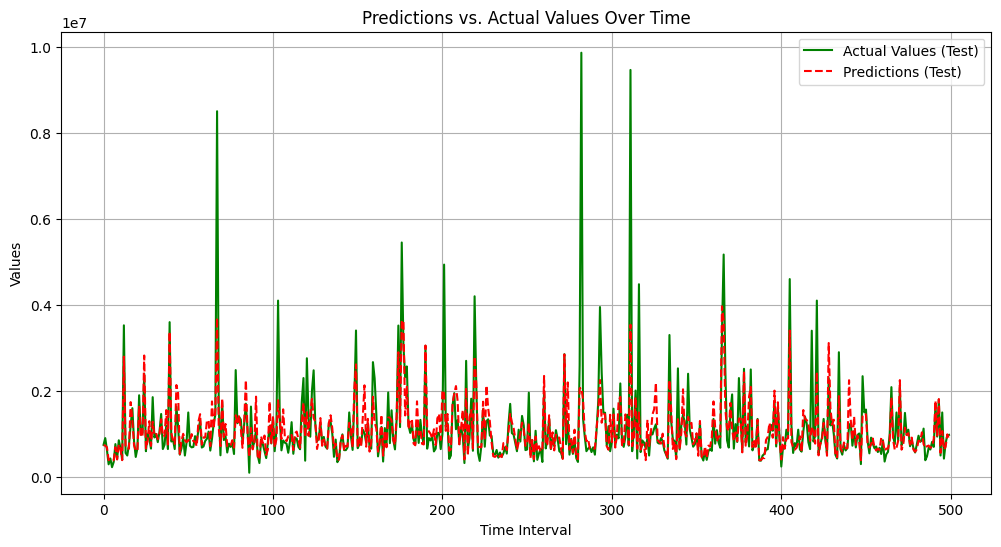

In [34]:
train_time = range(len(y_train[-500:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(500), y_test[-500:], label='Actual Values (Test)', color='green')
plt.plot(range(500), predictions[-500:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

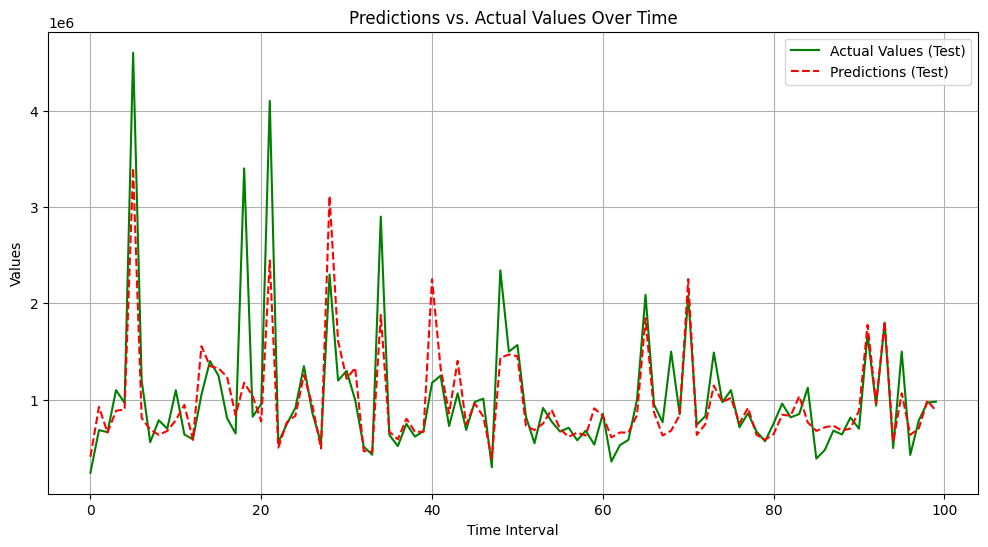

In [35]:
train_time = range(len(y_train[-100:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[-100:], label='Actual Values (Test)', color='green')
plt.plot(range(100), predictions[-100:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()